Speech Emotion Recognition

In [28]:
# import libraries
import pandas as pd
import numpy as np

import os as os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

# import keras
# from keras.callbacks import ReduceLROnPlateau
# from keras.models import Sequential
# from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
# from keras.utils import np_utils, to_categorical
# from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

Data Preparation
- As we are working with four different datasets, so i will be creating a dataframe storing all emotions of the data in dataframe with their paths.
- We will use this dataframe to extract features for our model training.

In [29]:
# Paths for data
Crema = "/Users/sebastianbayne/Documents/WBS/Bootcamp/Final_Project /Datasets /Crema-D/AudioWAV"
Savee = "/Users/sebastianbayne/Documents/WBS/Bootcamp/Final_Project /Datasets /Savee/ALL/"
Tess = "/Users/sebastianbayne/Documents/WBS/Bootcamp/Final_Project /Datasets /Tess/TESS Toronto emotional speech set data"
Ravdess = "/Users/sebastianbayne/Documents/WBS/Bootcamp/Final_Project /Datasets /Ravdess/archive/audio_speech_actors_01-24"

In [30]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + '/' + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + "/" + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

Emotions                                               Path
0    angry  /Users/sebastianbayne/Documents/WBS/Bootcamp/F...
1     fear  /Users/sebastianbayne/Documents/WBS/Bootcamp/F...
2     fear  /Users/sebastianbayne/Documents/WBS/Bootcamp/F...
3    angry  /Users/sebastianbayne/Documents/WBS/Bootcamp/F...
4  disgust  /Users/sebastianbayne/Documents/WBS/Bootcamp/F...

In [31]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + '/' + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

Emotions                                               Path
0    angry  /Users/sebastianbayne/Documents/WBS/Bootcamp/F...
1    angry  /Users/sebastianbayne/Documents/WBS/Bootcamp/F...
2  neutral  /Users/sebastianbayne/Documents/WBS/Bootcamp/F...
3  neutral  /Users/sebastianbayne/Documents/WBS/Bootcamp/F...
4  disgust  /Users/sebastianbayne/Documents/WBS/Bootcamp/F...

In [32]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    if dir.startswith('.'):continue
    directories = os.listdir(Tess + '/' + dir)
    for file in directories:
        part = file.split('.')[0]
        if len(file.split('.'))<2:continue
        try:
            part = part.split('_')[2]
            if part=='ps':
                file_emotion.append('surprise')
            else:
                file_emotion.append(part)
            file_path.append(Tess + '/' + dir + '/' + file)
        except:
            print("Error occured at {}".format(file))
            continue

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

Error occured at .DS_Store


Emotions                                               Path
0  disgust  /Users/sebastianbayne/Documents/WBS/Bootcamp/F...
1  disgust  /Users/sebastianbayne/Documents/WBS/Bootcamp/F...
2  disgust  /Users/sebastianbayne/Documents/WBS/Bootcamp/F...
3  disgust  /Users/sebastianbayne/Documents/WBS/Bootcamp/F...
4  disgust  /Users/sebastianbayne/Documents/WBS/Bootcamp/F...

In [33]:
# Tess_df.Emotions.unique()

In [34]:
# Tess_df.query("Emotions == 'surprised'").iloc[0, 1]

In [35]:
# Tess_df.shape

In [36]:
[x[-2:] for x in Tess_df.tail().Path.str.split("/")]

[['OAF_Sad', 'OAF_tool_sad.wav'],
 ['OAF_Sad', 'OAF_goose_sad.wav'],
 ['OAF_Sad', 'OAF_met_sad.wav'],
 ['OAF_Sad', 'OAF_pearl_sad.wav'],
 ['OAF_Sad', 'OAF_rain_sad.wav']]

In [37]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

Emotions                                               Path
0       sad  /Users/sebastianbayne/Documents/WBS/Bootcamp/F...
1       sad  /Users/sebastianbayne/Documents/WBS/Bootcamp/F...
2   neutral  /Users/sebastianbayne/Documents/WBS/Bootcamp/F...
3  surprise  /Users/sebastianbayne/Documents/WBS/Bootcamp/F...
4   neutral  /Users/sebastianbayne/Documents/WBS/Bootcamp/F...

In [38]:
# # creating Dataframe using all the 4 dataframes we created so far.
# data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
# data_path.to_csv("/Users/sebastianbayne/Documents/WBS/Bootcamp/Final_Project /Datasets/data_path.csv",index=False)
# data_path.head()

# Define the directory path
directory_path = "/Users/sebastianbayne/Documents/WBS/Bootcamp/Final_Project /Datasets "

# Create the directory if it doesn't exist
if not os.path.exists(directory_path):
    os.makedirs(directory_path)

# Concatenate and save the DataFrame to CSV
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis=0)
data_path.to_csv(os.path.join(directory_path, "data_path.csv"), index=False)
data_path.head()

Emotions                                               Path
0    angry  /Users/sebastianbayne/Documents/WBS/Bootcamp/F...
1     fear  /Users/sebastianbayne/Documents/WBS/Bootcamp/F...
2     fear  /Users/sebastianbayne/Documents/WBS/Bootcamp/F...
3    angry  /Users/sebastianbayne/Documents/WBS/Bootcamp/F...
4  disgust  /Users/sebastianbayne/Documents/WBS/Bootcamp/F...

Data Visualisation and Exploration¶
    First let's plot the count of each emotions in our dataset.

<Axes: title={'center': 'Count of Emotions'}, xlabel='Emotions', ylabel='count'>

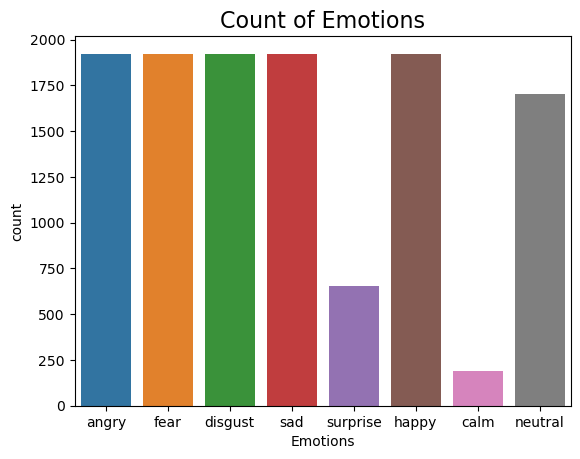

In [39]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path, x = 'Emotions')
# plt.ylabel('Count', size=12)
# plt.xlabel('Emotions', size=12)
# sns.despine(top=True, right=True, left=False, bottom=False)
# plt.show()

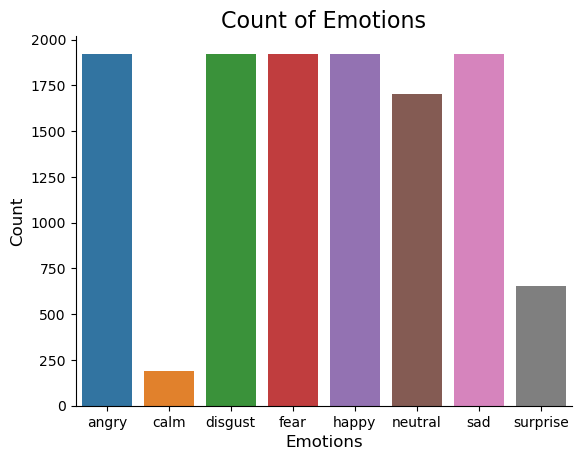

In [40]:
data_path['Emotions'] = data_path['Emotions'].astype('category')

# Create the countplot
plt.title('Count of Emotions', size=16)
sns.countplot(data=data_path, x='Emotions')
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [41]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

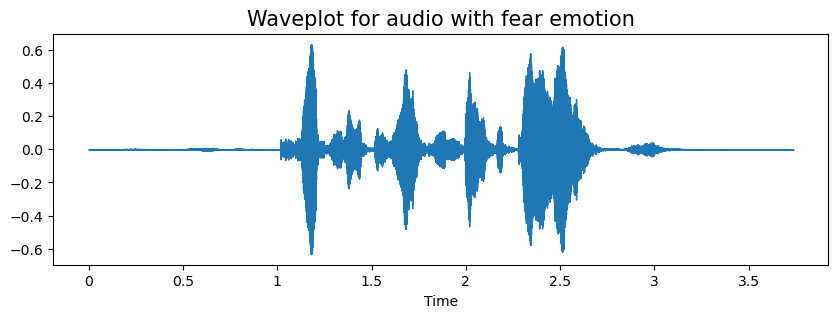

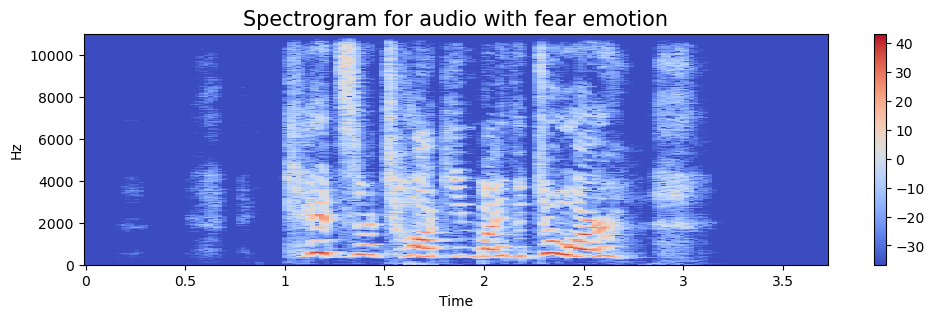

In [42]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

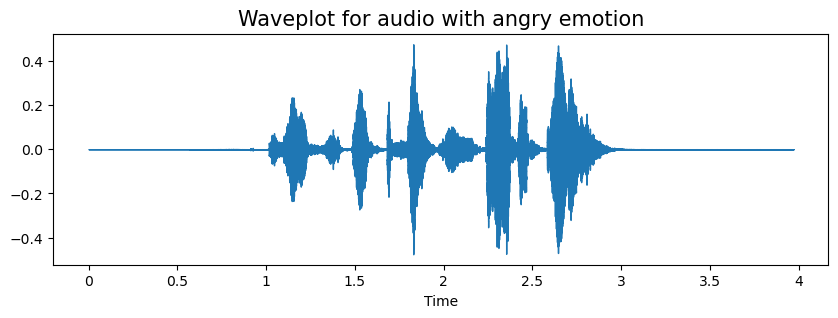

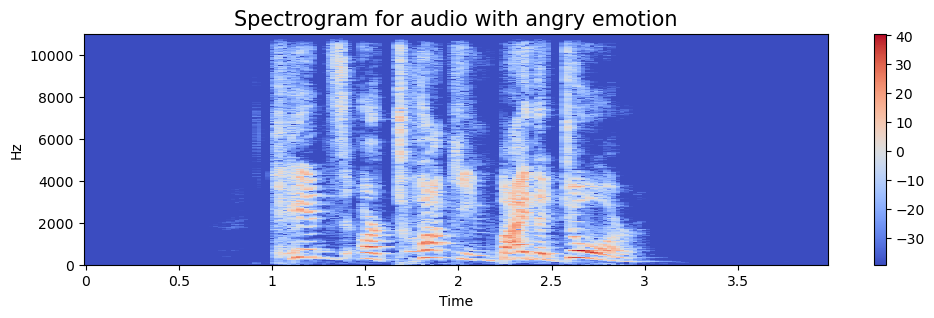

In [43]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

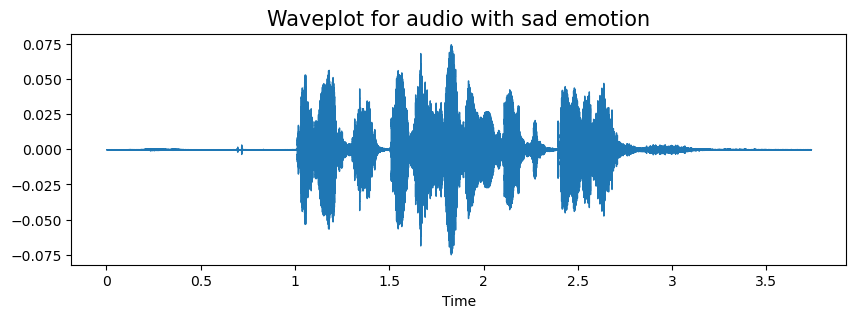

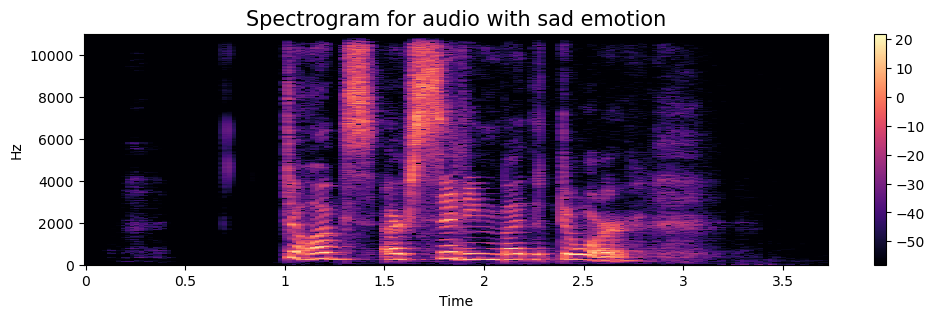

In [44]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

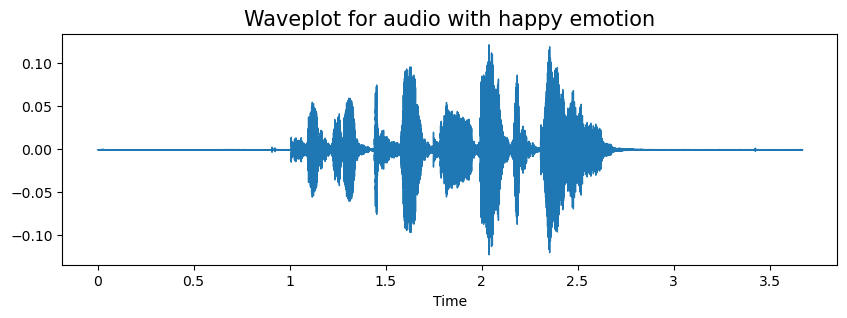

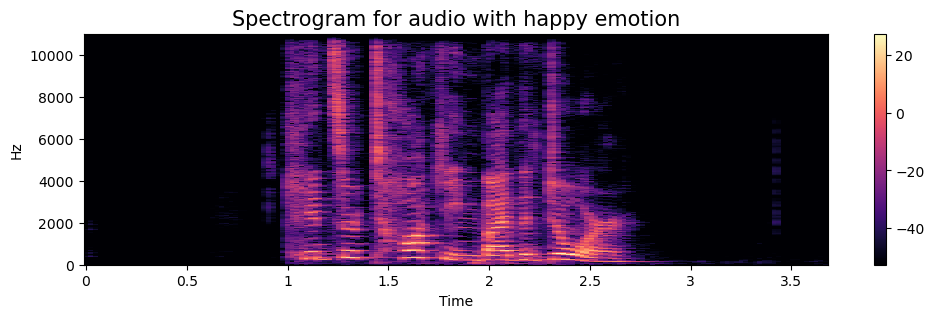

In [45]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

Data Augmentation
Data augmentation is the process by which we create new synthetic data samples by adding small perturbations on our initial training set.
To generate syntactic data for audio, we can apply noise injection, shifting time, changing pitch and speed.
The objective is to make our model invariant to those perturbations and enhace its ability to generalize.
In order to this to work adding the perturbations must conserve the same label as the original training sample.
In images data augmention can be performed by shifting the image, zooming, rotating ...
First, let's check which augmentation techniques works better for our dataset.

In [46]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate):
    return librosa.effects.time_stretch(data, rate=0.8)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sample_rate):
    return librosa.effects.pitch_shift(data, sr=sample_rate, n_steps=4)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

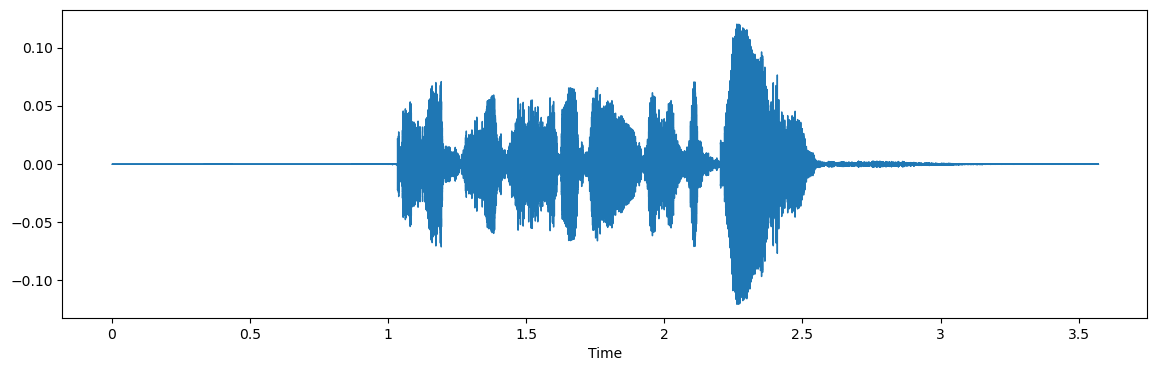

In [47]:
# 1. Simple Audio¶
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

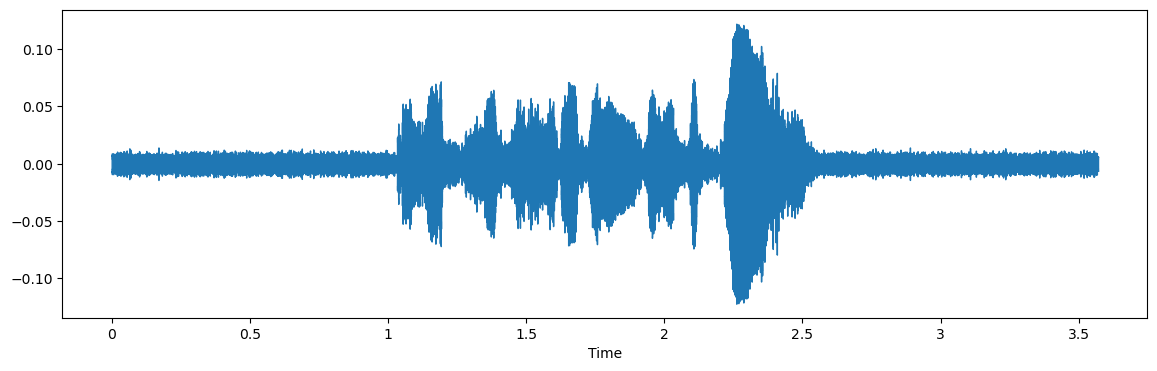

In [48]:
# 2. Noise Injection¶
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

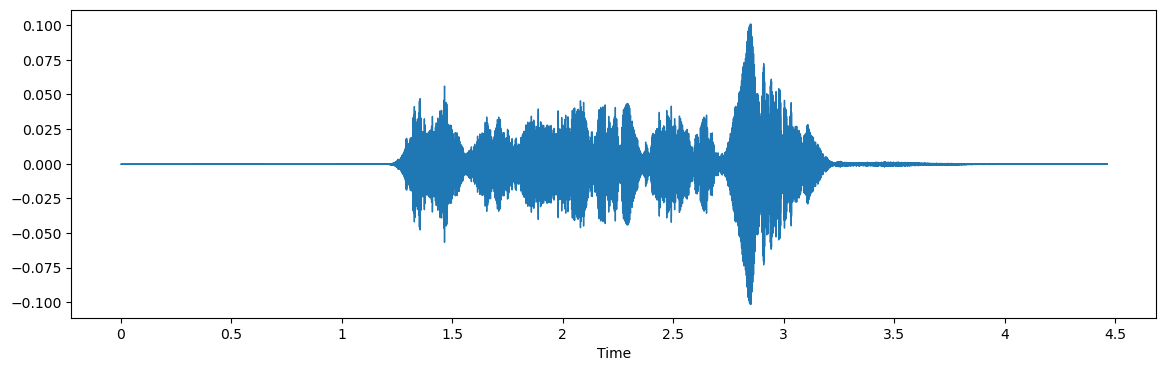

In [49]:
# 3. Stretching
# rate = 0.8 # replace with 0.8 to stretch the audio
x = stretch(data, rate=0.8) 
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)


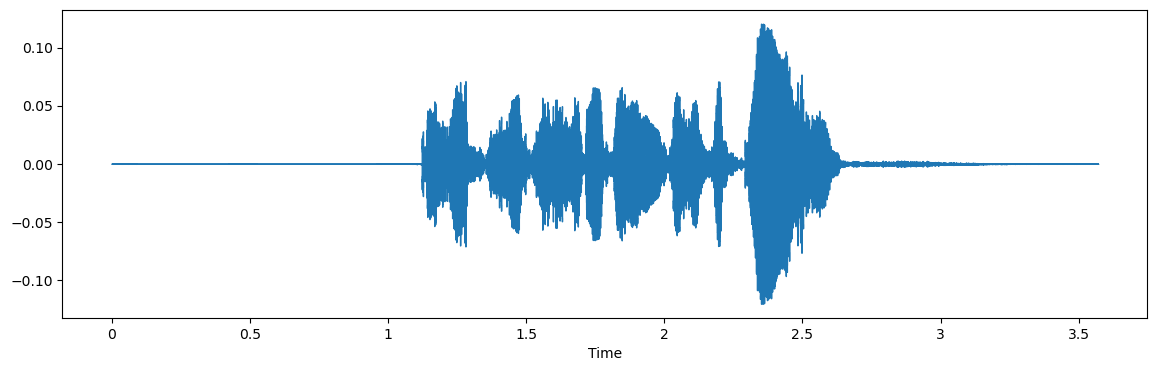

In [50]:
#  4. Shifting
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate) 

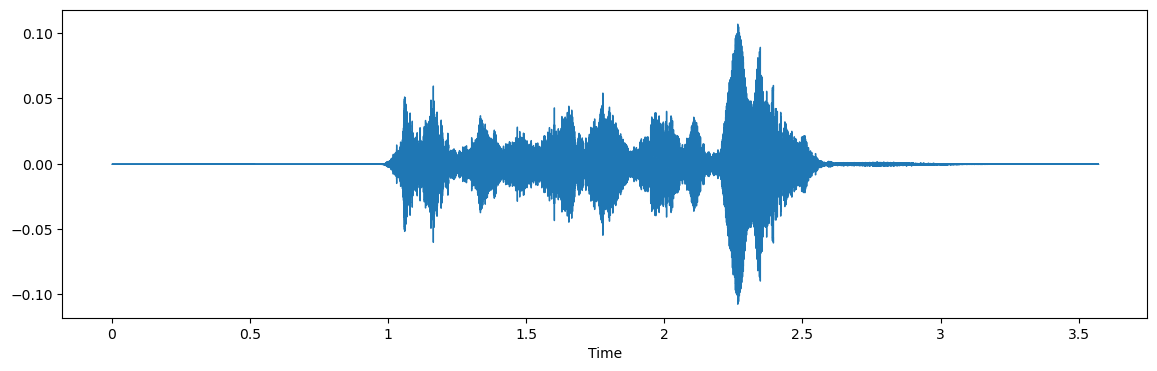

In [51]:
# 5. Pitching
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

In [52]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data, rate=0.8)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [56]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [57]:
len(X), len(Y), data_path.Path.shape

(36486, 36486, (12162,))

In [59]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv(directory_path, 'features.csv', index=False)
Features.head()

IsADirectoryError: [Errno 21] Is a directory: '/Users/sebastianbayne/Documents/WBS/Bootcamp/Final_Project /Datasets '

In [60]:


# Your existing code to create the Features DataFrame
Features = pd.DataFrame(X)
Features['labels'] = Y

# Specify the directory path where you want to save the CSV file
directory_path = '/Users/sebastianbayne/Documents/WBS/Bootcamp/Final_Project/Datasets'

# Specify the complete file path including the directory and the file name
csv_filename = os.path.join(directory_path, 'features.csv')

# Save the CSV file
Features.to_csv(csv_filename, index=False)

Features.head()


0         1         2         3         4         5         6  \
0  0.204540  0.529672  0.468962  0.484619  0.554953  0.547627  0.610107   
1  0.358389  0.715994  0.690211  0.703800  0.752247  0.721094  0.726788   
2  0.253385  0.617889  0.633958  0.637618  0.595904  0.453717  0.385295   
3  0.189815  0.560047  0.520643  0.485150  0.440329  0.394749  0.403051   
4  0.303010  0.734567  0.734405  0.728397  0.699863  0.665553  0.602866   

          7         8         9  ...       153       154       155       156  \
0  0.558435  0.531272  0.598957  ...  0.006682  0.004037  0.004855  0.004624   
1  0.646352  0.641919  0.702635  ...  0.011455  0.009252  0.009230  0.009232   
2  0.408127  0.467859  0.472802  ...  0.002486  0.001242  0.001032  0.001230   
3  0.411808  0.440498  0.506417  ...  0.002601  0.002952  0.003851  0.003154   
4  0.573901  0.575842  0.607765  ...  0.002865  0.003230  0.004087  0.003386   

        157       158       159       160       161  labels  
0  0.005723  0.006007  0.006103  0.005150  0.000251   angry  
1  0.010764  0.010767  0.010324  0.009285  0.004867   angry  
2  0.001894  0.002229  0.002979  0.001724  0.000143   angry  
3  0.002964  0.002586  0.002761  0.001653  0.000115    fear  
4  0.003232  0.002853  0.003079  0.001962  0.000379    fear  

[5 rows x 163 columns]

Data Preparation

In [61]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [62]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [63]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162), (27364, 8), (9122, 162), (9122, 8))

In [64]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162), (27364, 8), (9122, 162), (9122, 8))

In [65]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162, 1), (27364, 8), (9122, 162, 1), (9122, 8))